In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("data/bfd_2021.csv")

/tmp/ipykernel_7295/1745297862.py:1: DtypeWarning: Columns (4,5,42,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/bfd_2021.csv")


In [3]:
df.shape

(606602, 48)

In [4]:
df.columns

Index(['arrival', 'depart', 'route', 'company', 'flight', 'di', 'type',
       'depart_day_period', 'arrival_day_period', 'expected_depart',
       'real_depart', 'expected_arrival', 'real_arrival', 'status_depart',
       'status_arrival', 'observation', 'delay_depart', 'delay_arrival',
       'expected_flight_length', 'real_flight_length', 'outlier_depart_delay',
       'outlier_arrival_delay', 'outlier_expected_flight_consistency',
       'outlier_real_flight_consistency', 'outlier_expected_flight_length',
       'outlier_real_flight_length', 'depart_air_temperature',
       'depart_dew_point', 'depart_relative_humidity', 'depart_wind_direction',
       'depart_wind_speed', 'depart_sky_coverage', 'depart_pressure',
       'depart_visibility', 'depart_apparent_temperature',
       'depart_wind_speed_scale', 'depart_wind_direction_cat',
       'arrival_air_temperature', 'arrival_dew_point',
       'arrival_relative_humidity', 'arrival_wind_direction',
       'arrival_wind_speed', 'arr

In [5]:
df.head(5)

arrival depart      route company flight di type depart_day_period  \
0    CYHM   KMIA  KMIA-CYHM     CJT   1592  2    I             Night   
1    CYUL   SBGR  SBGR-CYUL     ACA   0097  0    I     Early Morning   
2    CYUL   SBGR  SBGR-CYUL     ACA   0097  0    I     Early Morning   
3    CYUL   SBGR  SBGR-CYUL     ACA   0097  0    I     Early Morning   
4    CYUL   SBGR  SBGR-CYUL     ACA   0097  0    I     Early Morning   

  arrival_day_period      expected_depart  ... arrival_dew_point  \
0      Early Morning  2021-11-08 02:35:00  ...               NaN   
1      Early Evening  2021-01-02 08:45:00  ...               NaN   
2      Early Evening  2021-01-04 08:45:00  ...               NaN   
3      Early Evening  2021-01-09 08:40:00  ...               NaN   
4      Early Evening  2021-01-11 08:40:00  ...               NaN   

  arrival_relative_humidity arrival_wind_direction arrival_wind_speed  \
0                       NaN                    NaN                NaN   
1                       NaN                    NaN                NaN   
2                       NaN                    NaN                NaN   
3                       NaN                    NaN                NaN   
4                       NaN                    NaN                NaN   

  arrival_sky_coverage  arrival_pressure  arrival_visibility  \
0                  NaN               NaN                 NaN   
1                  NaN               NaN                 NaN   
2                  NaN               NaN                 NaN   
3                  NaN               NaN                 NaN   
4                  NaN               NaN                 NaN   

   arrival_apparent_temperature  arrival_wind_speed_scale  \
0                           NaN                       NaN   
1                           NaN                       NaN   
2                           NaN                       NaN   
3                           NaN                       NaN   
4                           NaN                       NaN   

   arrival_wind_direction_cat  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  

[5 rows x 48 columns]

In [6]:
df.describe()

observation   delay_depart  delay_arrival  expected_flight_length  \
count          0.0  584379.000000  584377.000000           606602.000000   
mean           NaN       2.780588      -0.569990              143.102093   
std            NaN     137.821604     139.236616              129.322913   
min            NaN  -86981.000000  -87023.000000               10.000000   
25%            NaN      -7.000000     -13.000000               75.000000   
50%            NaN      -3.000000      -6.000000              100.000000   
75%            NaN       3.000000       4.000000              160.000000   
max            NaN    5608.000000    5567.000000             1430.000000   

       real_flight_length  depart_air_temperature  depart_dew_point  \
count       584377.000000           555084.000000     554929.000000   
mean           137.459671               23.262670         17.387988   
std            124.639192                5.126913          4.838068   
min              0.000000               -2.000000        -23.000000   
25%             71.000000               20.000000         14.000000   
50%             98.000000               24.000000         18.000000   
75%            156.000000               27.000000         21.000000   
max           1430.000000               41.000000         31.000000   

       depart_relative_humidity  depart_wind_direction  depart_wind_speed  \
count             554926.000000          538538.000000      555083.000000   
mean                  72.295338             145.782452           6.822724   
std                   17.860727              92.083217           3.817608   
min                    5.330000               0.000000           0.000000   
25%                   61.580000              80.000000           4.000000   
50%                   74.110000             130.000000           6.000000   
75%                   87.830000             180.000000           9.000000   
max                  100.000000             360.000000          99.000000   

       ...  depart_visibility  depart_apparent_temperature  \
count  ...      555316.000000                554926.000000   
mean   ...           5.926864                    23.877816   
std    ...           0.875200                     6.036840   
min    ...           0.000000                    -5.955556   
25%    ...           6.210000                    20.000000   
50%    ...           6.210000                    24.000000   
75%    ...           6.210000                    28.194444   
max    ...           6.210000                    56.438889   

       arrival_air_temperature  arrival_dew_point  arrival_relative_humidity  \
count            552818.000000      552696.000000              552683.000000   
mean                 23.327194          17.333793                  71.953472   
std                   5.152536           4.911350                  18.257232   
min                  -2.000000         -13.000000                   7.000000   
25%                  20.000000          14.000000                  61.130000   
50%                  24.000000          18.000000                  74.110000   
75%                  27.000000          21.000000                  87.920000   
max                  41.000000          36.000000                 100.000000   

       arrival_wind_direction  arrival_wind_speed  arrival_pressure  \
count           536662.000000       552919.000000     553064.000000   
mean               147.196746            6.828105         29.994394   
std                 91.952290            3.811162          0.212730   
min                  0.000000            0.000000          0.030000   
25%                 80.000000            4.000000         29.910000   
50%                130.000000            6.000000         29.970000   
75%                190.000000            9.000000         30.090000   
max                360.000000           99.000000         56.460000   

       arrival_visibility  arrival_apparent_temperature  
count     

In [7]:
df.isna().sum()

arrival                                     0
depart                                      0
route                                       0
company                                     0
flight                                      0
di                                          7
type                                        9
depart_day_period                           0
arrival_day_period                          0
expected_depart                             0
real_depart                             22223
expected_arrival                            0
real_arrival                            22225
status_depart                           22223
status_arrival                          22225
observation                            606602
delay_depart                            22223
delay_arrival                           22225
expected_flight_length                      0
real_flight_length                      22225
outlier_depart_delay                    22223
outlier_arrival_delay             

In [8]:
df.duplicated().sum()

1

In [9]:
print(df['status_depart'].value_counts())
print("-" * 20)
print(df['status_arrival'].value_counts())

status_depart
Antecipado        369032
Pontual           179388
Atraso 30-60       19085
Atraso 60-120       8776
Atraso 120-240      5013
Atraso > 240        3085
Name: count, dtype: int64
--------------------
status_arrival
Antecipado        386183
Pontual           162161
Atraso 30-60       19138
Atraso 60-120       8789
Atraso 120-240      4935
Atraso > 240        3171
Name: count, dtype: int64


In [10]:
print(df['status_depart'].value_counts(normalize=True))
print("-" * 20)
print(df['status_arrival'].value_counts(normalize=True))

status_depart
Antecipado        0.631494
Pontual           0.306972
Atraso 30-60      0.032659
Atraso 60-120     0.015018
Atraso 120-240    0.008578
Atraso > 240      0.005279
Name: proportion, dtype: float64
--------------------
status_arrival
Antecipado        0.660846
Pontual           0.277494
Atraso 30-60      0.032749
Atraso 60-120     0.015040
Atraso 120-240    0.008445
Atraso > 240      0.005426
Name: proportion, dtype: float64


In [11]:
df.isna().sum()

arrival                                     0
depart                                      0
route                                       0
company                                     0
flight                                      0
di                                          7
type                                        9
depart_day_period                           0
arrival_day_period                          0
expected_depart                             0
real_depart                             22223
expected_arrival                            0
real_arrival                            22225
status_depart                           22223
status_arrival                          22225
observation                            606602
delay_depart                            22223
delay_arrival                           22225
expected_flight_length                      0
real_flight_length                      22225
outlier_depart_delay                    22223
outlier_arrival_delay             

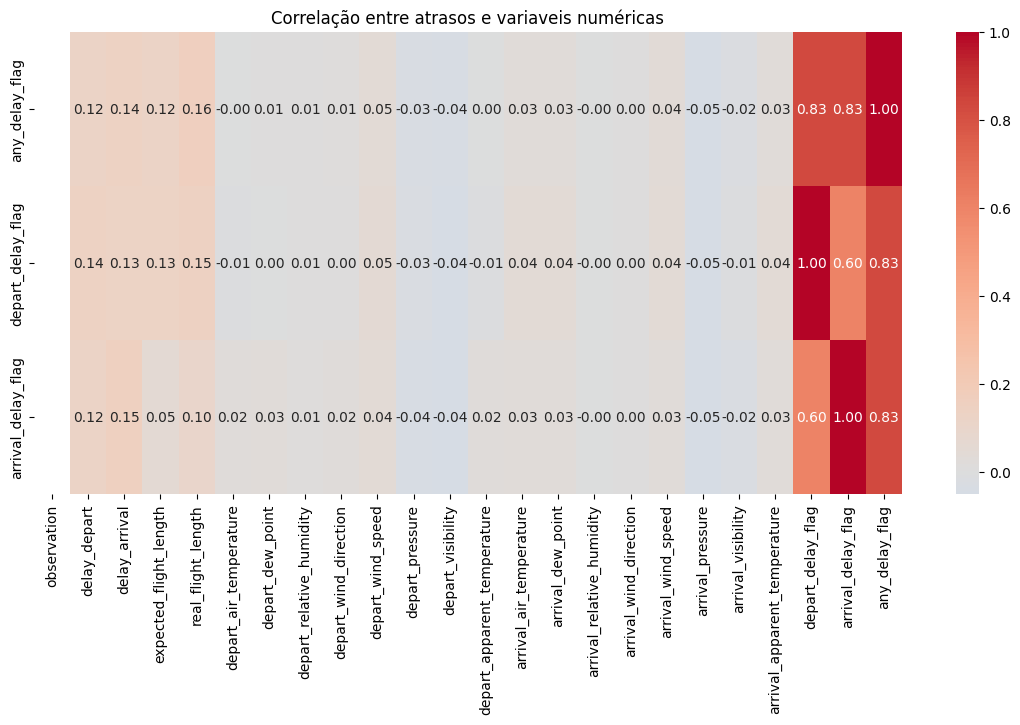

In [12]:
df['depart_delay_flag'] = df['delay_depart'].apply(lambda x: 1 if x > 0 else 0)
df['arrival_delay_flag'] = df['delay_arrival'].apply(lambda x: 1 if x > 0 else 0)
df['any_delay_flag'] = df.apply(
    lambda row: 1 if row['depart_delay_flag'] == 1 or row['arrival_delay_flag'] == 1 else 0,
    axis=1
)

cols = df.select_dtypes(include=['number']).columns.tolist()

corr = df[cols].corr()

plt.figure(figsize=(14,6))
sns.heatmap(
    corr.loc[['any_delay_flag', 'depart_delay_flag', 'arrival_delay_flag']],
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f'
    )
plt.title('Correlação entre atrasos e variaveis numéricas')
plt.show()

## Atraso por companhia aerea

In [13]:
df_plot = df.copy()

df_plot['depart_delay_flag'] = df_plot['delay_depart'].apply(lambda x: 'Atraso' if x > 0 else 'Sem atraso')
df_plot['arrival_delay_flag'] = df_plot['delay_arrival'].apply(lambda x: 'Atraso' if x > 0 else 'Sem atraso')
df_plot['any_delay_flag'] = df_plot.apply(
    lambda row: 'Atraso' if row['depart_delay_flag'] == 'Atraso' or row['arrival_delay_flag'] == 'Atraso' else 'Sem atraso',
    axis=1
)


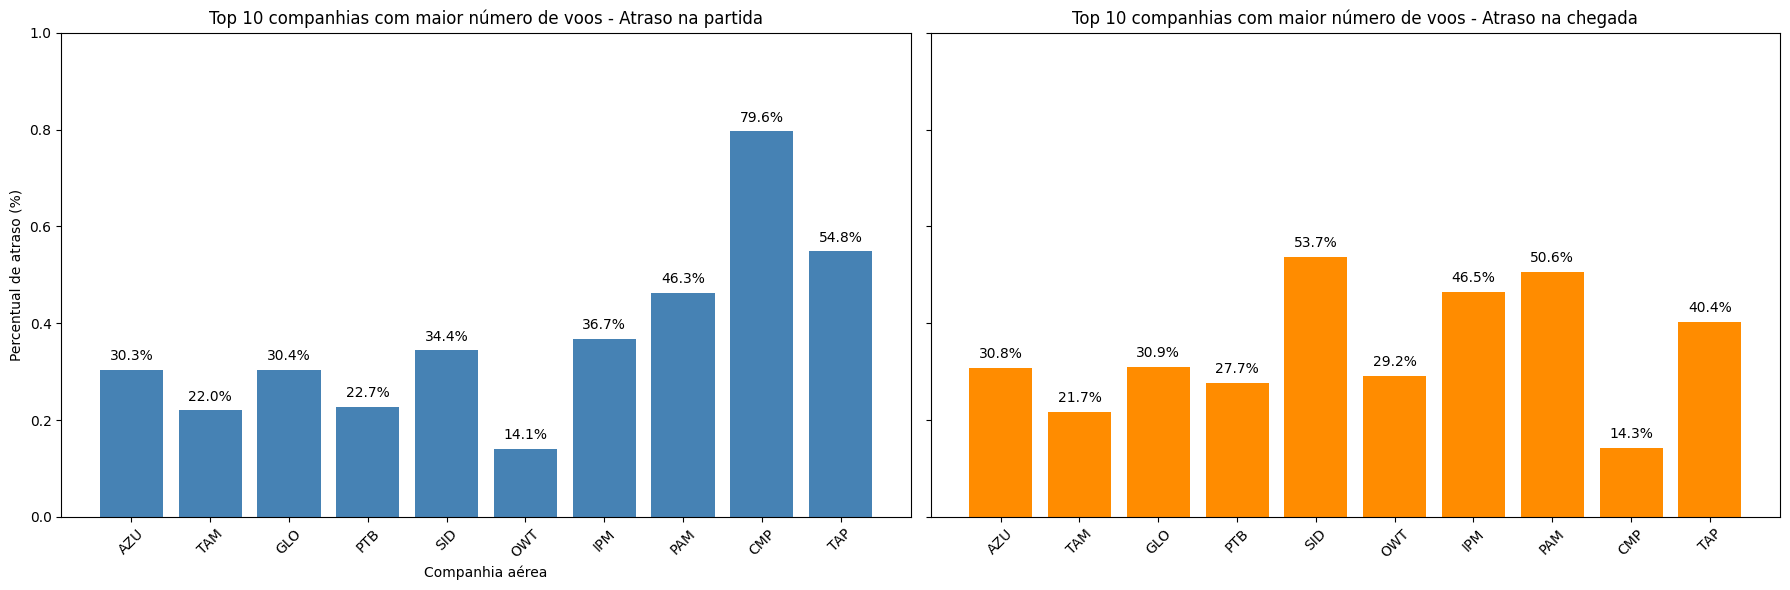

In [14]:
grouped_depart = df_plot.groupby(['company', 'depart_delay_flag']).size().unstack(fill_value=0)
grouped_depart['total_voos'] = grouped_depart['Atraso'] + grouped_depart['Sem atraso']
top10_depart = grouped_depart.sort_values('total_voos', ascending=False).head(10)
top10_depart['percent_atraso'] = top10_depart['Atraso'] / top10_depart['total_voos']

grouped_arrival = df_plot.groupby(['company', 'arrival_delay_flag']).size().unstack(fill_value=0)
grouped_arrival['total_voos'] = grouped_arrival['Atraso'] + grouped_arrival['Sem atraso']
top10_arrival = grouped_arrival.sort_values('total_voos', ascending=False).head(10)
top10_arrival['percent_atraso'] = top10_arrival['Atraso'] / top10_arrival['total_voos']

fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

axs[0].bar(top10_depart.index, top10_depart['percent_atraso'], color='steelblue')
axs[0].set_title('Top 10 companhias com maior número de voos - Atraso na partida')
axs[0].set_xlabel('Companhia aérea')
axs[0].set_ylabel('Percentual de atraso (%)')
axs[0].set_ylim(0, 1)
axs[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(top10_depart['percent_atraso']):
    axs[0].text(i, v + 0.02, f"{v:.1%}", ha='center')

axs[1].bar(top10_arrival.index, top10_arrival['percent_atraso'], color='darkorange')
axs[1].set_title('Top 10 companhias com maior número de voos - Atraso na chegada')
axs[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(top10_arrival['percent_atraso']):
    axs[1].text(i, v + 0.02, f"{v:.1%}", ha='center')

plt.tight_layout()
plt.show()


## Atraso por tempo

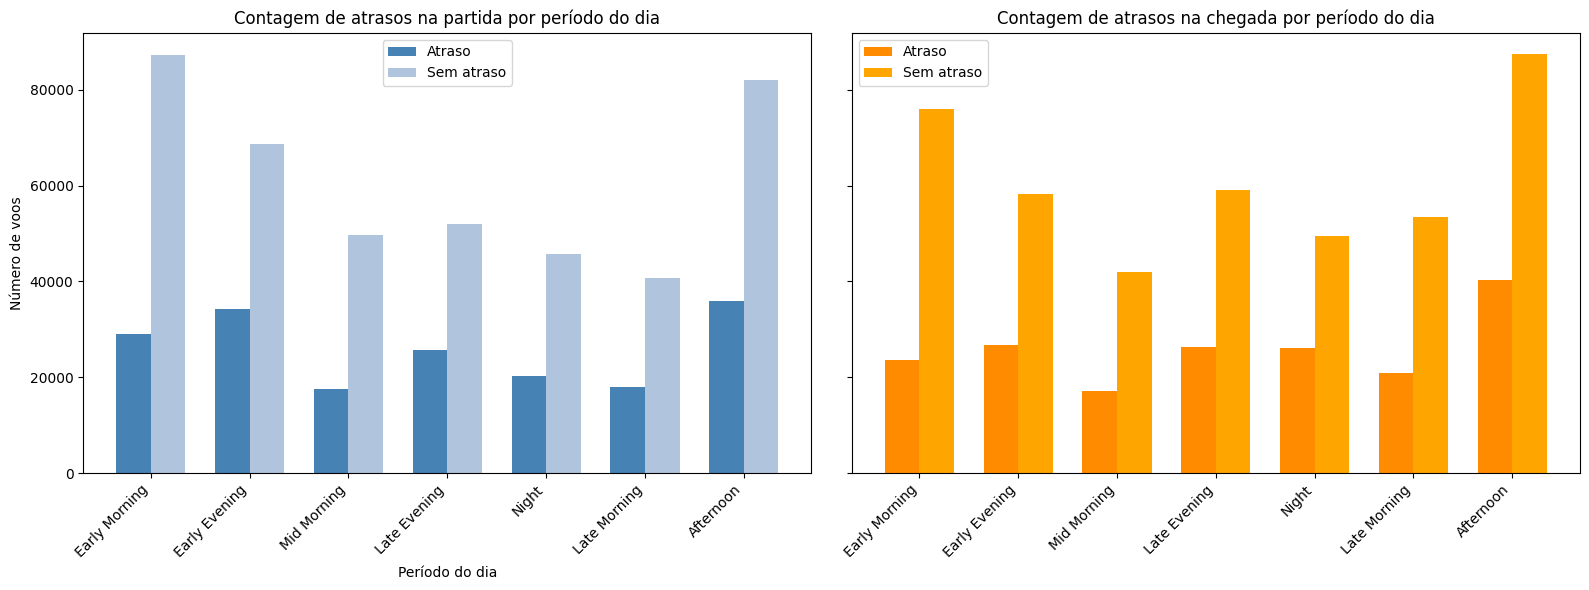

In [15]:
grouped_depart = df_plot.groupby(['depart_day_period', 'depart_delay_flag']).size().unstack(fill_value=0)
grouped_arrival = df_plot.groupby(['arrival_day_period', 'arrival_delay_flag']).size().unstack(fill_value=0)

period_order = df['arrival_day_period'].unique().tolist()

grouped_depart = grouped_depart.reindex(period_order)
grouped_arrival = grouped_arrival.reindex(period_order)

bar_width = 0.35
x_depart = np.arange(len(grouped_depart.index))
x_arrival = np.arange(len(grouped_arrival.index))

fig, axs = plt.subplots(1, 2, figsize=(16,6), sharey=True)

axs[0].bar(x_depart - bar_width/2, grouped_depart['Atraso'], width=bar_width, label='Atraso', color='steelblue')
axs[0].bar(x_depart + bar_width/2, grouped_depart['Sem atraso'], width=bar_width, label='Sem atraso', color='lightsteelblue')
axs[0].set_title('Contagem de atrasos na partida por período do dia')
axs[0].set_xlabel('Período do dia')
axs[0].set_ylabel('Número de voos')
axs[0].set_xticks(x_depart)
axs[0].set_xticklabels(grouped_depart.index, rotation=45, ha='right')
axs[0].legend()

axs[1].bar(x_arrival - bar_width/2, grouped_arrival['Atraso'], width=bar_width, label='Atraso', color='darkorange')
axs[1].bar(x_arrival + bar_width/2, grouped_arrival['Sem atraso'], width=bar_width, label='Sem atraso', color='orange')
axs[1].set_title('Contagem de atrasos na chegada por período do dia')
axs[1].set_xticks(x_arrival)
axs[1].set_xticklabels(grouped_arrival.index, rotation=45, ha='right')
axs[1].legend()

plt.tight_layout()
plt.show()


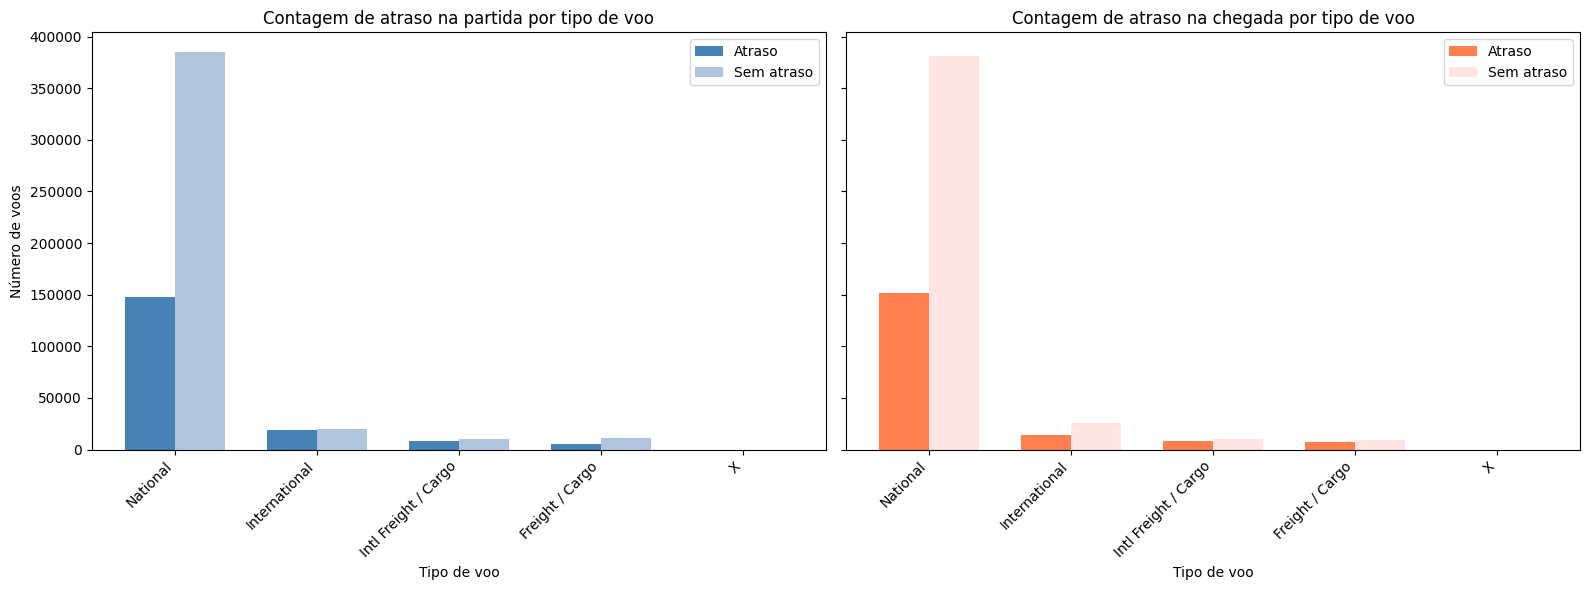

In [16]:
type_labels = {
    'N': 'National',
    'I': 'International',
    'R': 'Regional',
    'H': 'Sub-regional',
    'E': 'Special',
    'C': 'Freight / Cargo',
    'G': 'Intl Freight / Cargo',
    'L': 'Postal Network'
} # peguei da documentação do dataset

grouped_depart = df_plot.groupby(['type', 'depart_delay_flag']).size().unstack(fill_value=0)
grouped_arrival = df_plot.groupby(['type', 'arrival_delay_flag']).size().unstack(fill_value=0)

grouped_depart = grouped_depart.loc[grouped_depart.sum(axis=1).sort_values(ascending=False).index]
grouped_arrival = grouped_arrival.loc[grouped_arrival.sum(axis=1).sort_values(ascending=False).index]

types_depart = grouped_depart.index
types_arrival = grouped_arrival.index

x_depart = np.arange(len(types_depart))
x_arrival = np.arange(len(types_arrival))

x_labels_depart = [type_labels.get(t, t) for t in types_depart]
x_labels_arrival = [type_labels.get(t, t) for t in types_arrival]

bar_width = 0.35

fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axs[0].bar(x_depart - bar_width/2, grouped_depart['Atraso'], width=bar_width, label='Atraso', color='steelblue')
axs[0].bar(x_depart + bar_width/2, grouped_depart['Sem atraso'], width=bar_width, label='Sem atraso', color='lightsteelblue')
axs[0].set_title('Contagem de atraso na partida por tipo de voo')
axs[0].set_xlabel('Tipo de voo')
axs[0].set_ylabel('Número de voos')
axs[0].set_xticks(x_depart)
axs[0].set_xticklabels(x_labels_depart, rotation=45, ha='right')
axs[0].legend()

axs[1].bar(x_arrival - bar_width/2, grouped_arrival['Atraso'], width=bar_width, label='Atraso', color='coral')
axs[1].bar(x_arrival + bar_width/2, grouped_arrival['Sem atraso'], width=bar_width, label='Sem atraso', color='mistyrose')
axs[1].set_title('Contagem de atraso na chegada por tipo de voo')
axs[1].set_xlabel('Tipo de voo')
axs[1].set_xticks(x_arrival)
axs[1].set_xticklabels(x_labels_arrival, rotation=45, ha='right')
axs[1].legend()

plt.tight_layout()
plt.show()


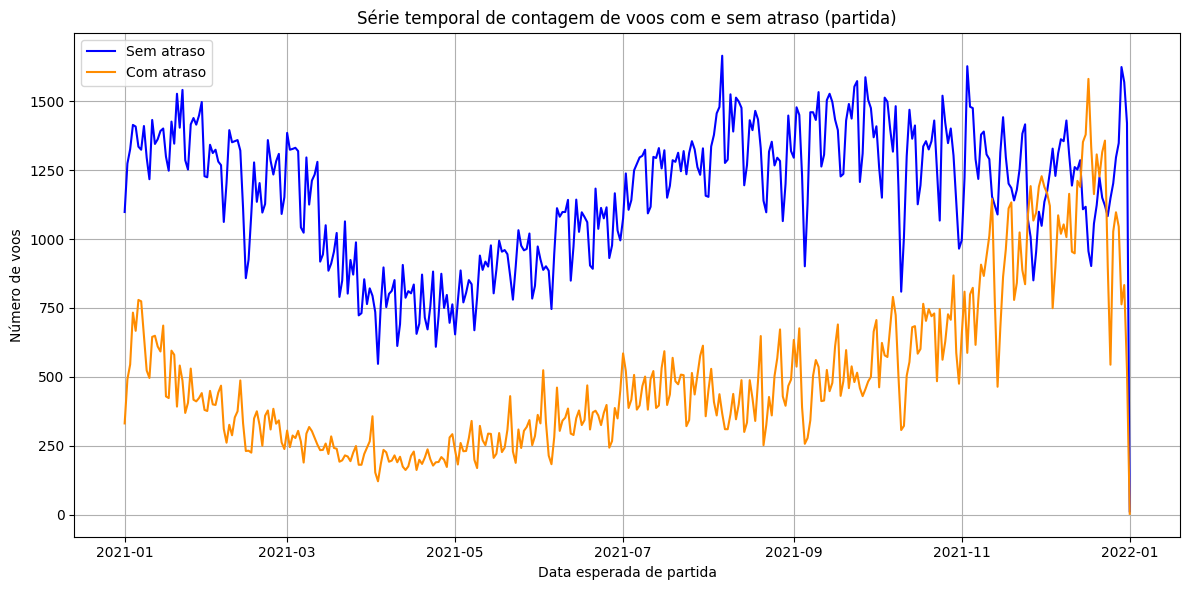

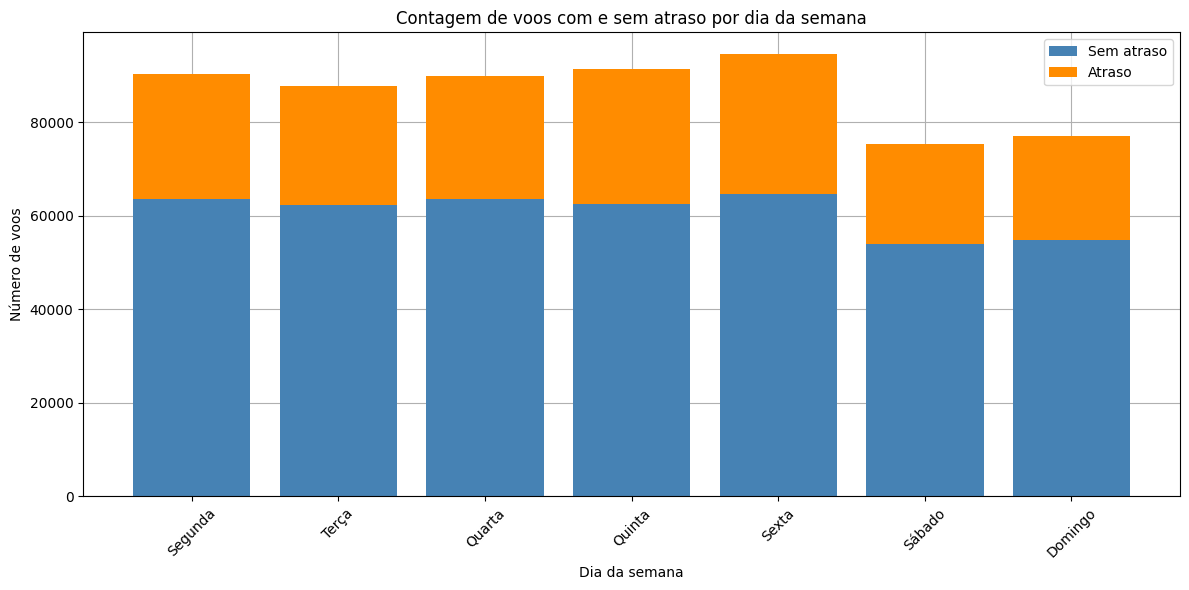

In [17]:
df_plot['expected_depart'] = pd.to_datetime(df_plot['expected_depart'], format='mixed') # Coluna com formatos conflitantes alguns tem YYYY-MM-DD e outros YYYY-MM-DD HH:MM:SS
df_plot = df_plot.dropna(subset=['expected_depart'])

time_grouped = df_plot.groupby([pd.Grouper(key='expected_depart', freq='D'), 'depart_delay_flag']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
plt.plot(time_grouped.index, time_grouped.get('Sem atraso', 0), label='Sem atraso', color='blue')
plt.plot(time_grouped.index, time_grouped.get('Atraso', 0), label='Com atraso', color='darkorange')
plt.title('Série temporal de contagem de voos com e sem atraso (partida)')
plt.xlabel('Data esperada de partida')
plt.ylabel('Número de voos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

weekday_labels = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df_plot['weekday'] = df_plot['expected_depart'].dt.day_name()
grouped = df_plot.groupby(['weekday', 'depart_delay_flag']).size().unstack(fill_value=0)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = grouped.reindex(ordered_days)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(grouped.index, grouped['Sem atraso'], label='Sem atraso', color='steelblue', zorder=2)
ax.bar(grouped.index, grouped['Atraso'], bottom=grouped['Sem atraso'], label='Atraso', color='darkorange', zorder=2)
ax.set_title('Contagem de voos com e sem atraso por dia da semana')
ax.set_xlabel('Dia da semana')
ax.set_ylabel('Número de voos')
ax.set_xticks(range(len(grouped.index)))
ax.set_xticklabels([weekday_labels[day] for day in grouped.index], rotation=45)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


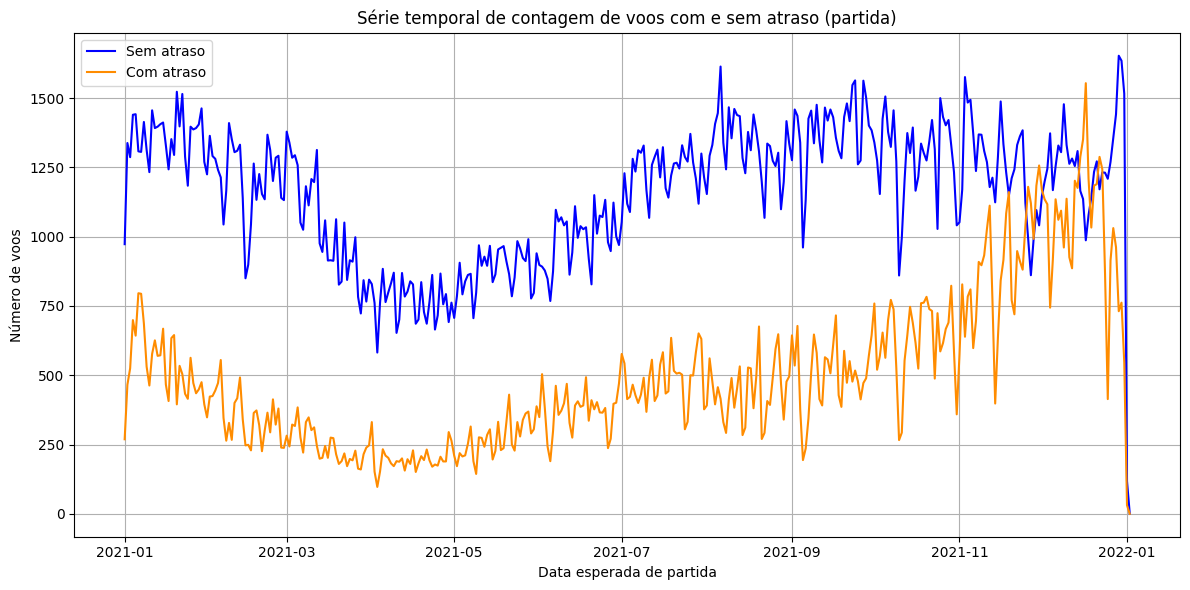

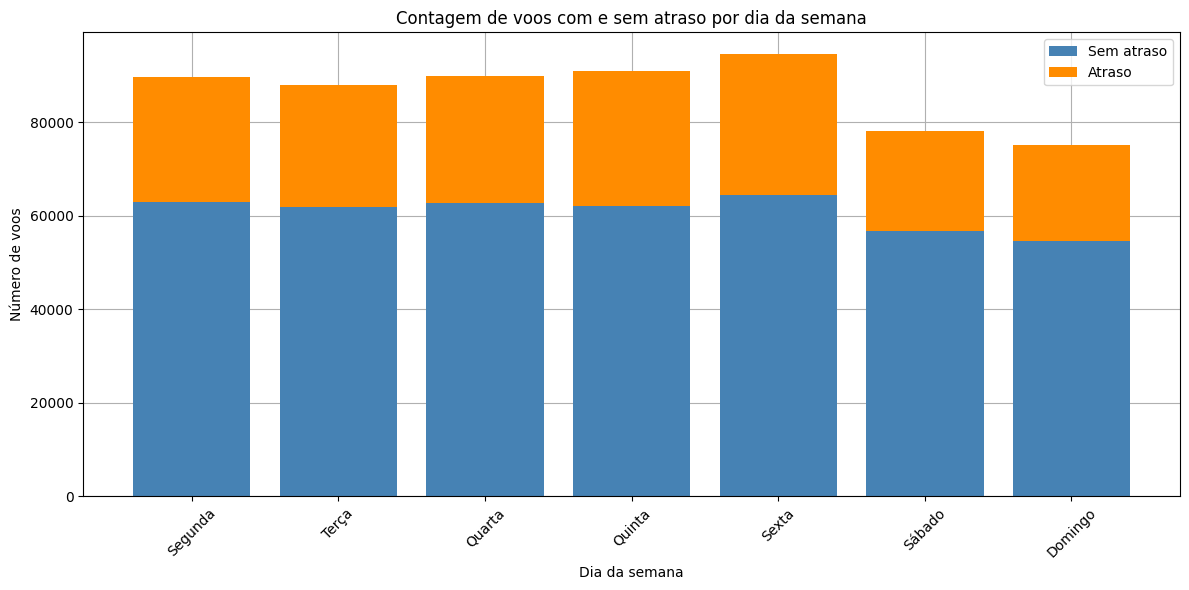

In [18]:
df_plot['expected_arrival'] = pd.to_datetime(df_plot['expected_arrival'], format='mixed')
df_plot = df_plot.dropna(subset=['expected_arrival'])

time_grouped = df_plot.groupby([pd.Grouper(key='expected_arrival', freq='D'), 'arrival_delay_flag']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
plt.plot(time_grouped.index, time_grouped.get('Sem atraso', 0), label='Sem atraso', color='blue')
plt.plot(time_grouped.index, time_grouped.get('Atraso', 0), label='Com atraso', color='darkorange')
plt.title('Série temporal de contagem de voos com e sem atraso (partida)')
plt.xlabel('Data esperada de partida')
plt.ylabel('Número de voos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df_plot['weekday'] = df_plot['expected_arrival'].dt.day_name()
grouped = df_plot.groupby(['weekday', 'arrival_delay_flag']).size().unstack(fill_value=0)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = grouped.reindex(ordered_days)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(grouped.index, grouped['Sem atraso'], label='Sem atraso', color='steelblue', zorder=2)
ax.bar(grouped.index, grouped['Atraso'], bottom=grouped['Sem atraso'], label='Atraso', color='darkorange', zorder=2)
ax.set_title('Contagem de voos com e sem atraso por dia da semana')
ax.set_xlabel('Dia da semana')
ax.set_ylabel('Número de voos')
ax.set_xticks(range(len(grouped.index)))
ax.set_xticklabels([weekday_labels[day] for day in grouped.index], rotation=45)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


## Atraso por localização

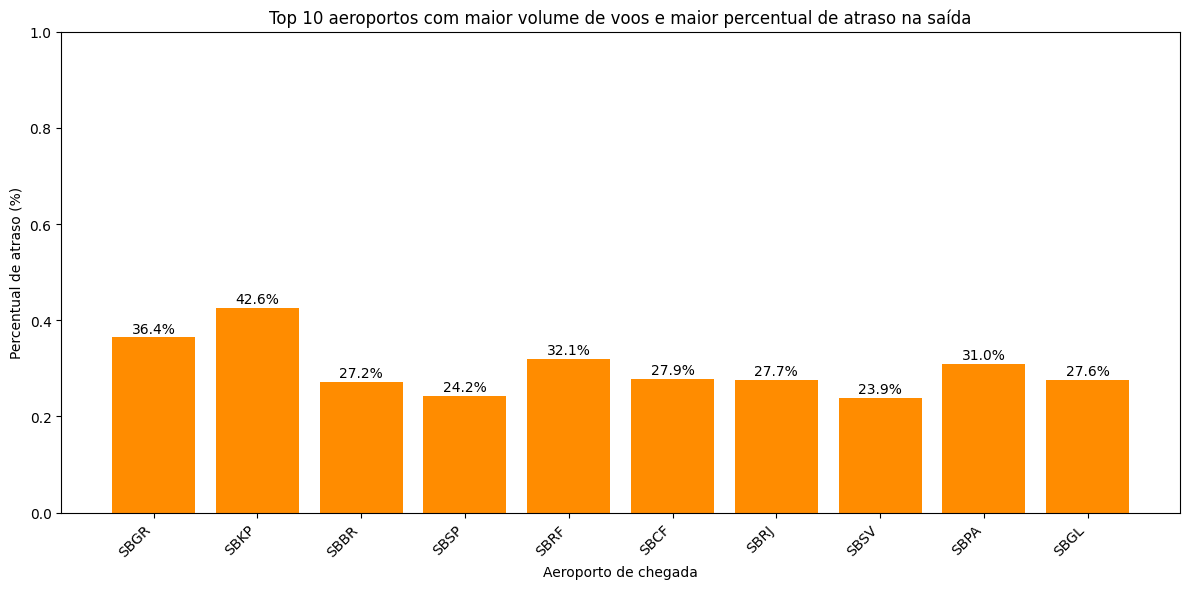

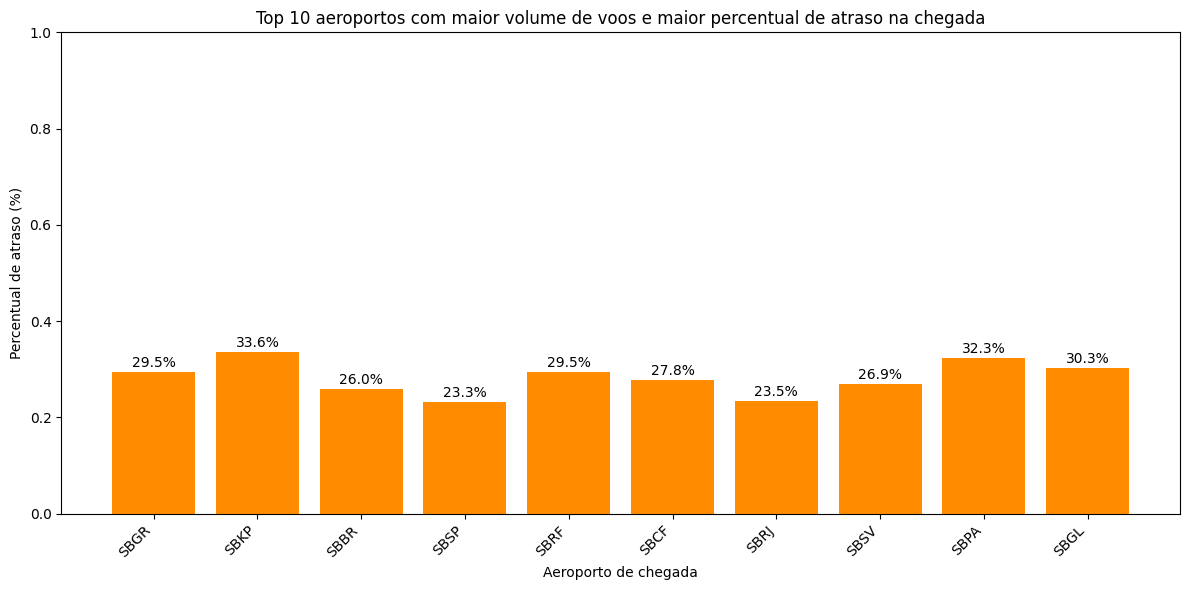

In [19]:
# Departure

grouped_depart = df_plot.groupby(['depart', 'depart_delay_flag']).size().unstack(fill_value=0)
grouped_depart['total_voos'] = grouped_depart.sum(axis=1)
grouped_depart['percent_atraso'] = grouped_depart['Atraso'] / grouped_depart['total_voos']

top10_volume = grouped_depart.sort_values('total_voos', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top10_volume.index, top10_volume['percent_atraso'], color='darkorange')
plt.title('Top 10 aeroportos com maior volume de voos e maior percentual de atraso na saída')
plt.xlabel('Aeroporto de chegada')
plt.ylabel('Percentual de atraso (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top10_volume['percent_atraso']):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Arrival
grouped_arrival = df_plot.groupby(['arrival', 'arrival_delay_flag']).size().unstack(fill_value=0)
grouped_arrival['total_voos'] = grouped_arrival.sum(axis=1)
grouped_arrival['percent_atraso'] = grouped_arrival['Atraso'] / grouped_arrival['total_voos']

top10_volume = grouped_arrival.sort_values('total_voos', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top10_volume.index, top10_volume['percent_atraso'], color='darkorange')
plt.title('Top 10 aeroportos com maior volume de voos e maior percentual de atraso na chegada')
plt.xlabel('Aeroporto de chegada')
plt.ylabel('Percentual de atraso (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top10_volume['percent_atraso']):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

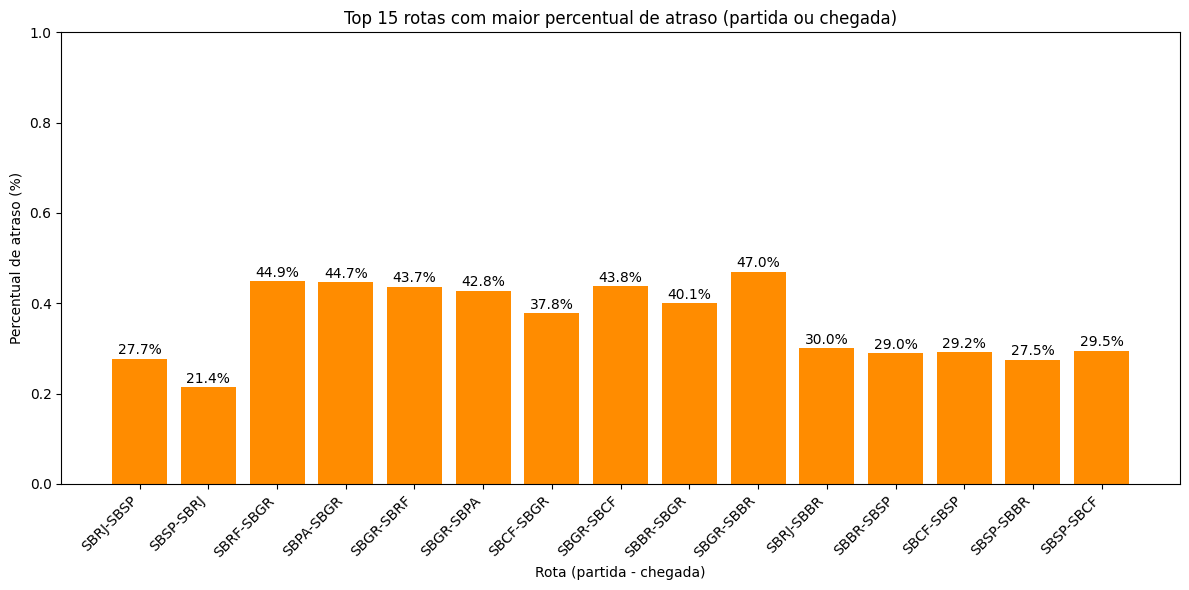

In [20]:
grouped_route = df_plot.groupby(['route', 'any_delay_flag']).size().unstack(fill_value=0)
grouped_route['total_voos'] = grouped_route.sum(axis=1)
grouped_route['percent_atraso'] = grouped_route['Atraso'] / grouped_route['total_voos']

top_routes = grouped_route.sort_values('total_voos', ascending=False).head(15)

plt.figure(figsize=(12,6))
plt.bar(top_routes.index, top_routes['percent_atraso'], color='darkorange')
plt.title('Top 15 rotas com maior percentual de atraso (partida ou chegada)')
plt.xlabel('Rota (partida - chegada)')
plt.ylabel('Percentual de atraso (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_routes['percent_atraso']):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


## Atraso por condições meteorológicas

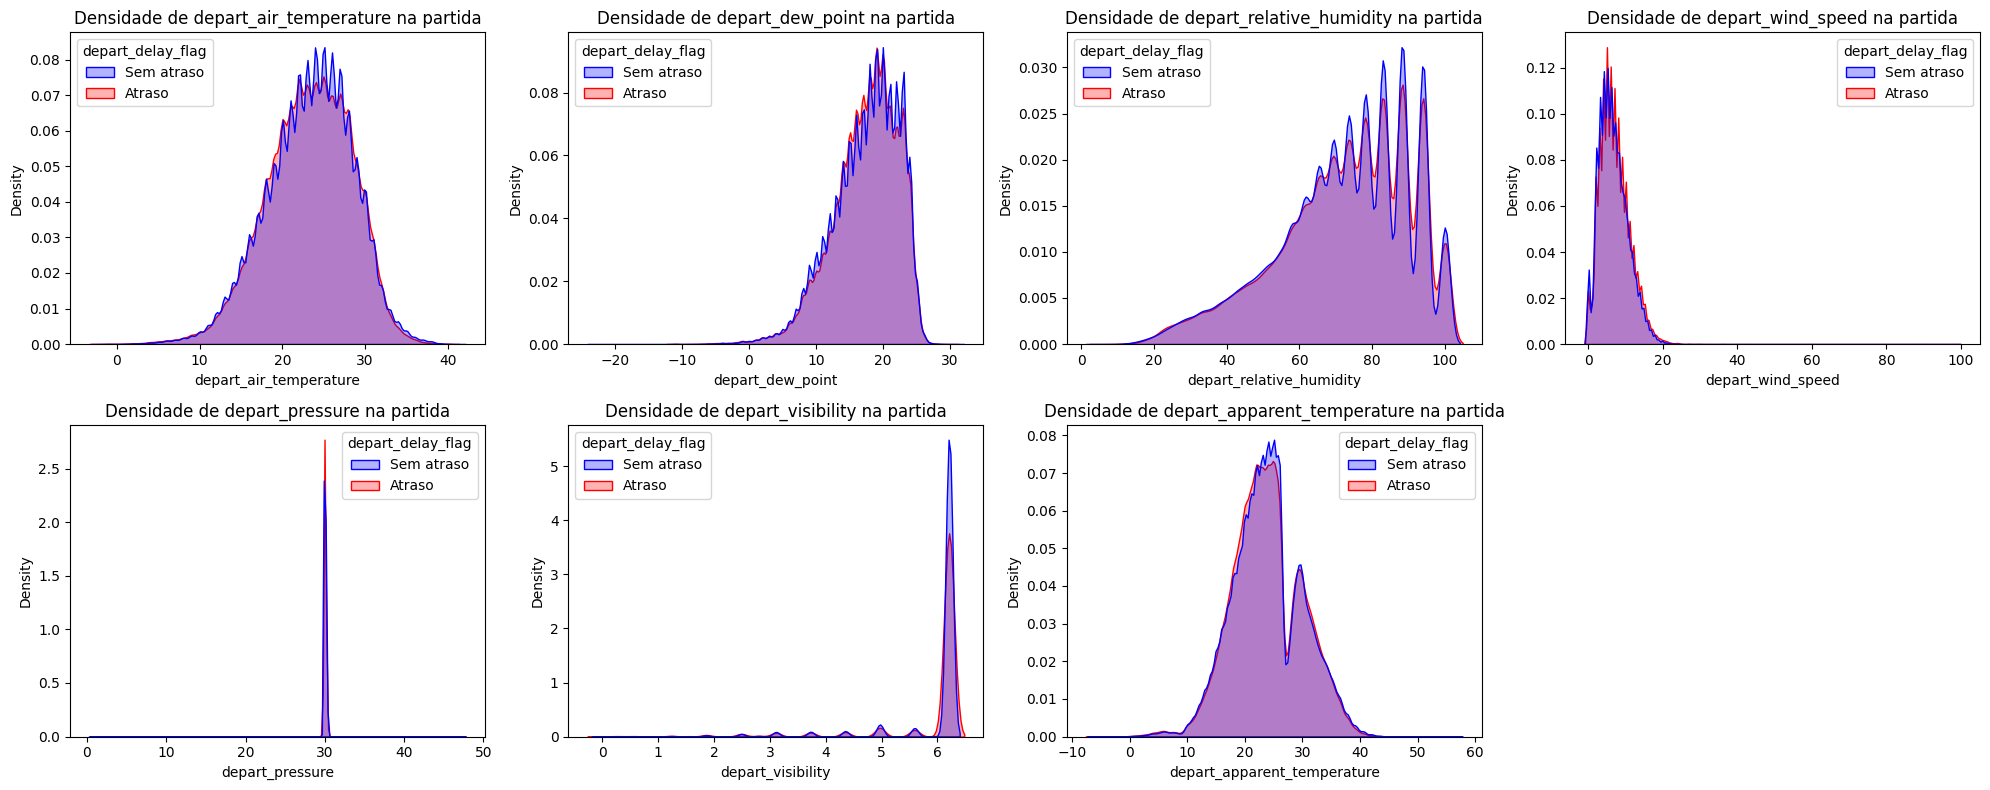

In [21]:
meteorological_depart_vars = [
    'depart_air_temperature', 'depart_dew_point', 'depart_relative_humidity', 'depart_wind_speed',
    'depart_pressure', 'depart_visibility', 'depart_apparent_temperature', 'depart_wind_speed_scale'
]

meteorological_depart_numeric_vars = [col for col in meteorological_depart_vars if col in df.select_dtypes(include=['number']).columns.tolist()]

n_vars = len(meteorological_depart_numeric_vars)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, var in enumerate(meteorological_depart_numeric_vars):
    ax = axes[i]
    sns.kdeplot(data=df_plot, x=var, hue='depart_delay_flag', common_norm=False,
                palette={'Atraso':'red', 'Sem atraso':'blue'}, ax=ax, fill=True, alpha=0.3)
    ax.set_title(f'Densidade de {var} na partida')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

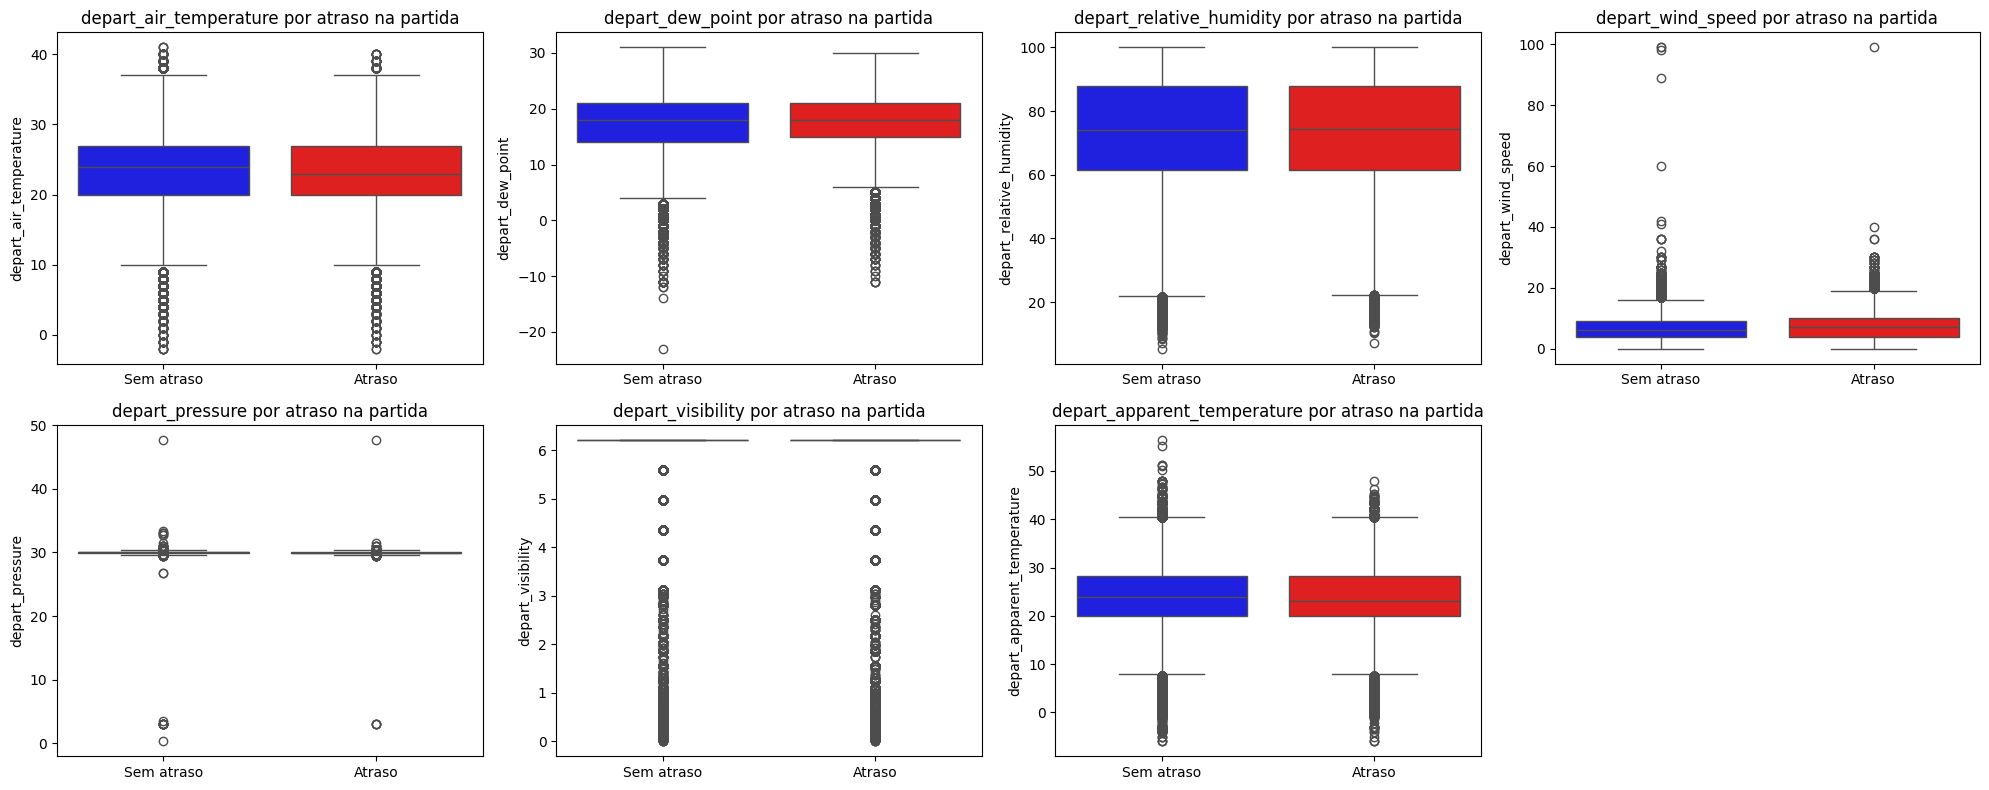

In [22]:
n_vars = len(meteorological_depart_numeric_vars)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, var in enumerate(meteorological_depart_numeric_vars):
    ax = axes[i]
    sns.boxplot(data=df_plot, x='depart_delay_flag', y=var, hue='depart_delay_flag',
                palette={'Atraso': 'red', 'Sem atraso': 'blue'} ,ax=ax)
    ax.set_title(f'{var} por atraso na partida')
    ax.set_xlabel('')
    ax.set_ylabel(var)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

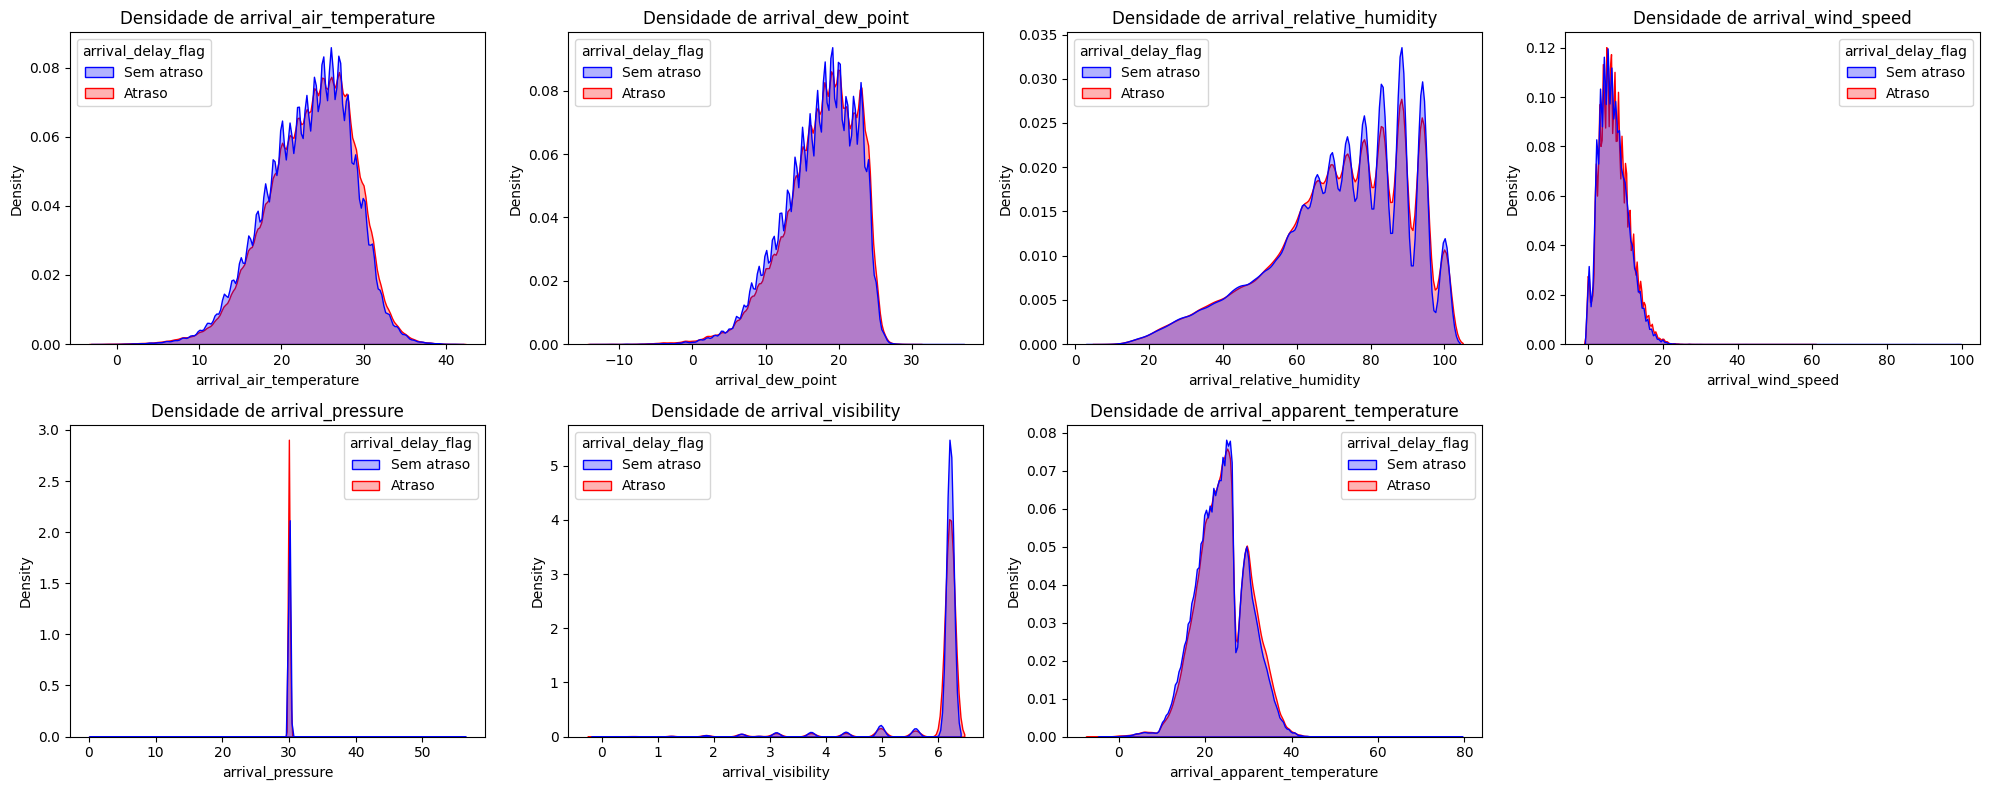

In [23]:
meteorological_arrival_vars = [
    'arrival_air_temperature', 'arrival_dew_point', 'arrival_relative_humidity', 'arrival_wind_speed',
    'arrival_pressure', 'arrival_visibility', 'arrival_apparent_temperature', 'arrival_wind_speed_scale'
]

meteorological_arrival_numeric_vars = [col for col in meteorological_arrival_vars if col in df.select_dtypes(include=['number']).columns.tolist()]

n_vars = len(meteorological_arrival_numeric_vars)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, var in enumerate(meteorological_arrival_numeric_vars):
    ax = axes[i]
    sns.kdeplot(data=df_plot, x=var, hue='arrival_delay_flag', common_norm=False,
                palette={'Atraso':'red', 'Sem atraso':'blue'}, ax=ax, fill=True, alpha=0.3)
    ax.set_title(f'Densidade de {var}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

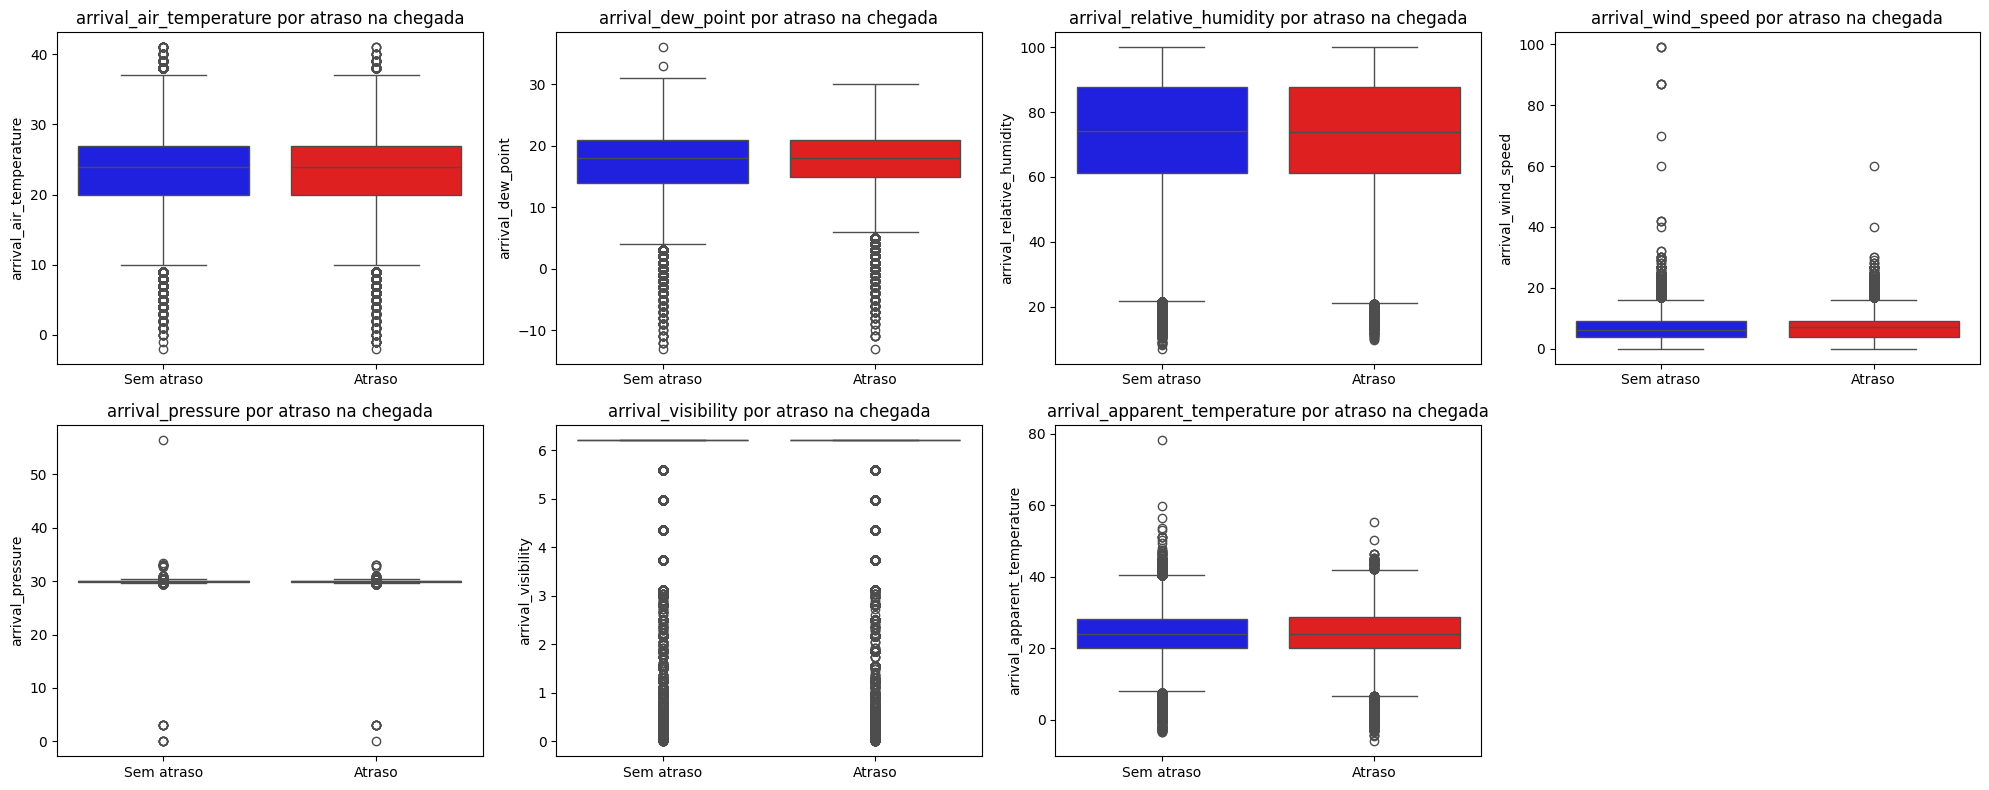

In [24]:
n_vars = len(meteorological_arrival_numeric_vars)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, var in enumerate(meteorological_arrival_numeric_vars):
    ax = axes[i]
    sns.boxplot(data=df_plot, x='arrival_delay_flag', y=var, hue='arrival_delay_flag',
                palette={'Atraso': 'red', 'Sem atraso': 'blue'} ,ax=ax)
    ax.set_title(f'{var} por atraso na chegada')
    ax.set_xlabel('')
    ax.set_ylabel(var)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlação entre variaveis

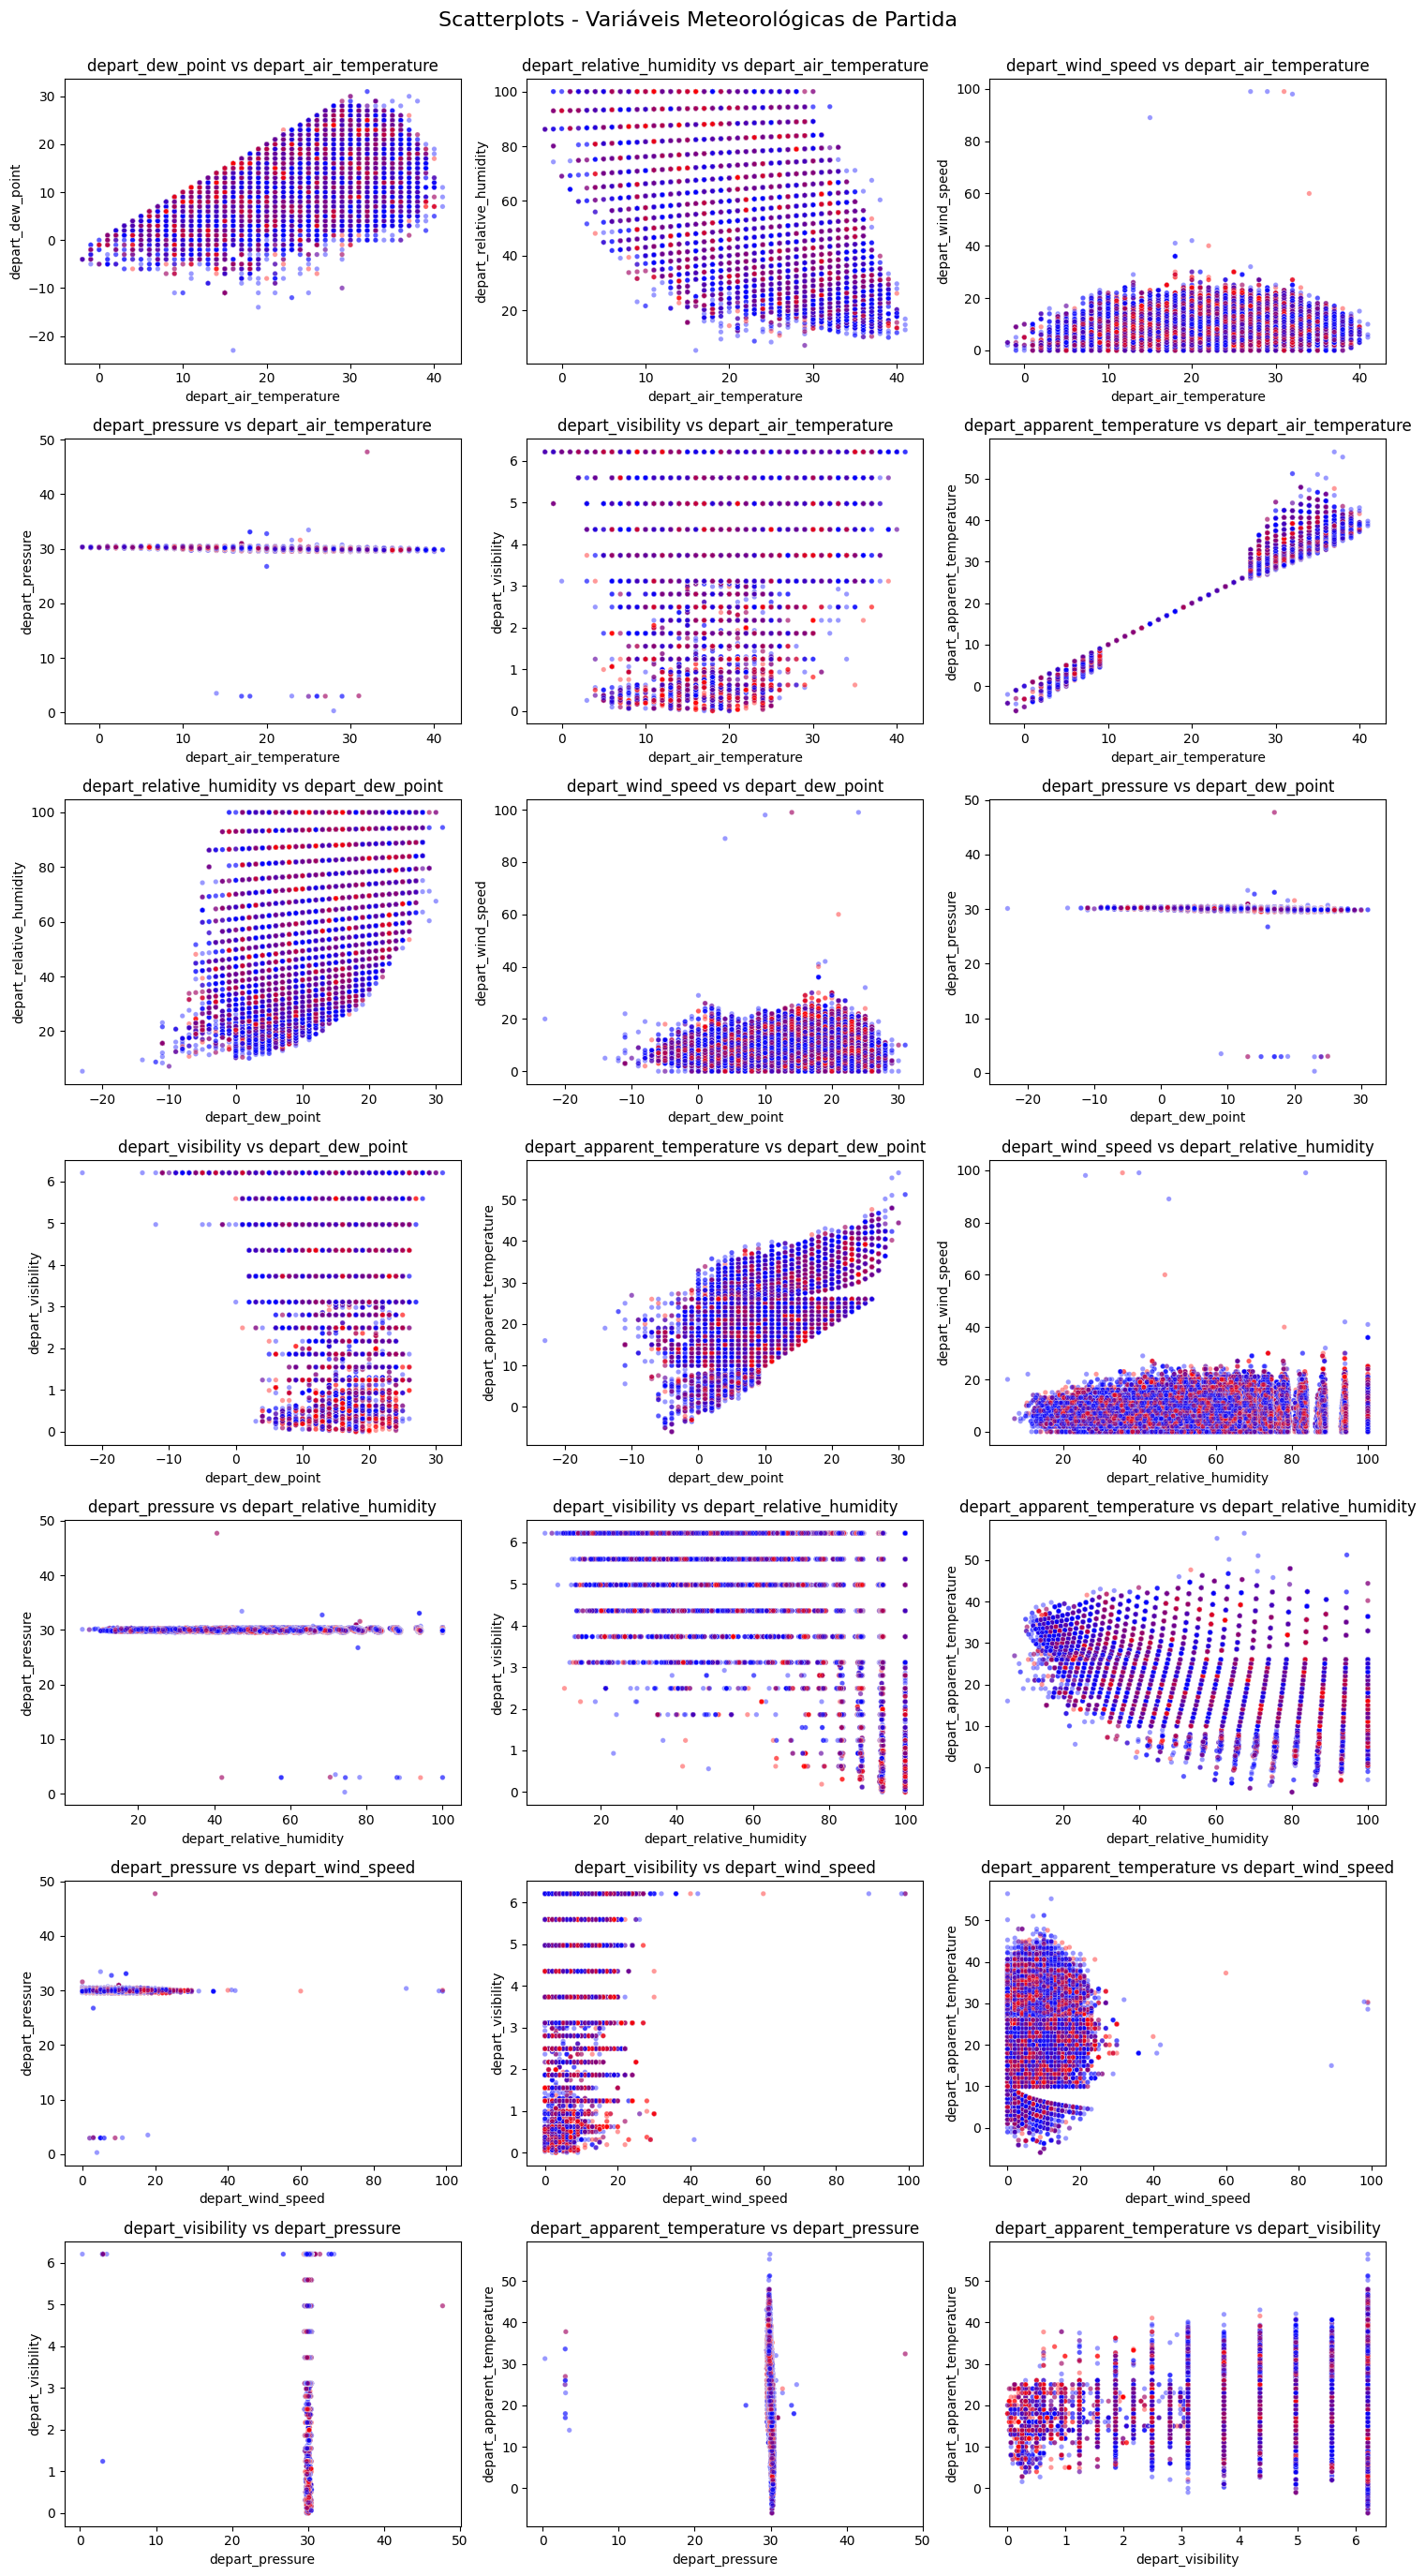

In [25]:
depart_pairs = list(itertools.combinations(meteorological_depart_numeric_vars, 2))

n_cols = 3
n_rows = (len(depart_pairs) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(depart_pairs):
    ax = axes[i]
    sns.scatterplot(
        data=df_plot,
        x=x_var,
        y=y_var,
        hue='arrival_delay_flag',
        palette={'Atraso': 'red', 'Sem atraso': 'blue'},
        alpha=0.4,
        s=15,
        ax=ax,
        legend=False
    )
    ax.set_title(f'{y_var} vs {x_var}')
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Scatterplots - Variáveis Meteorológicas de Partida', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

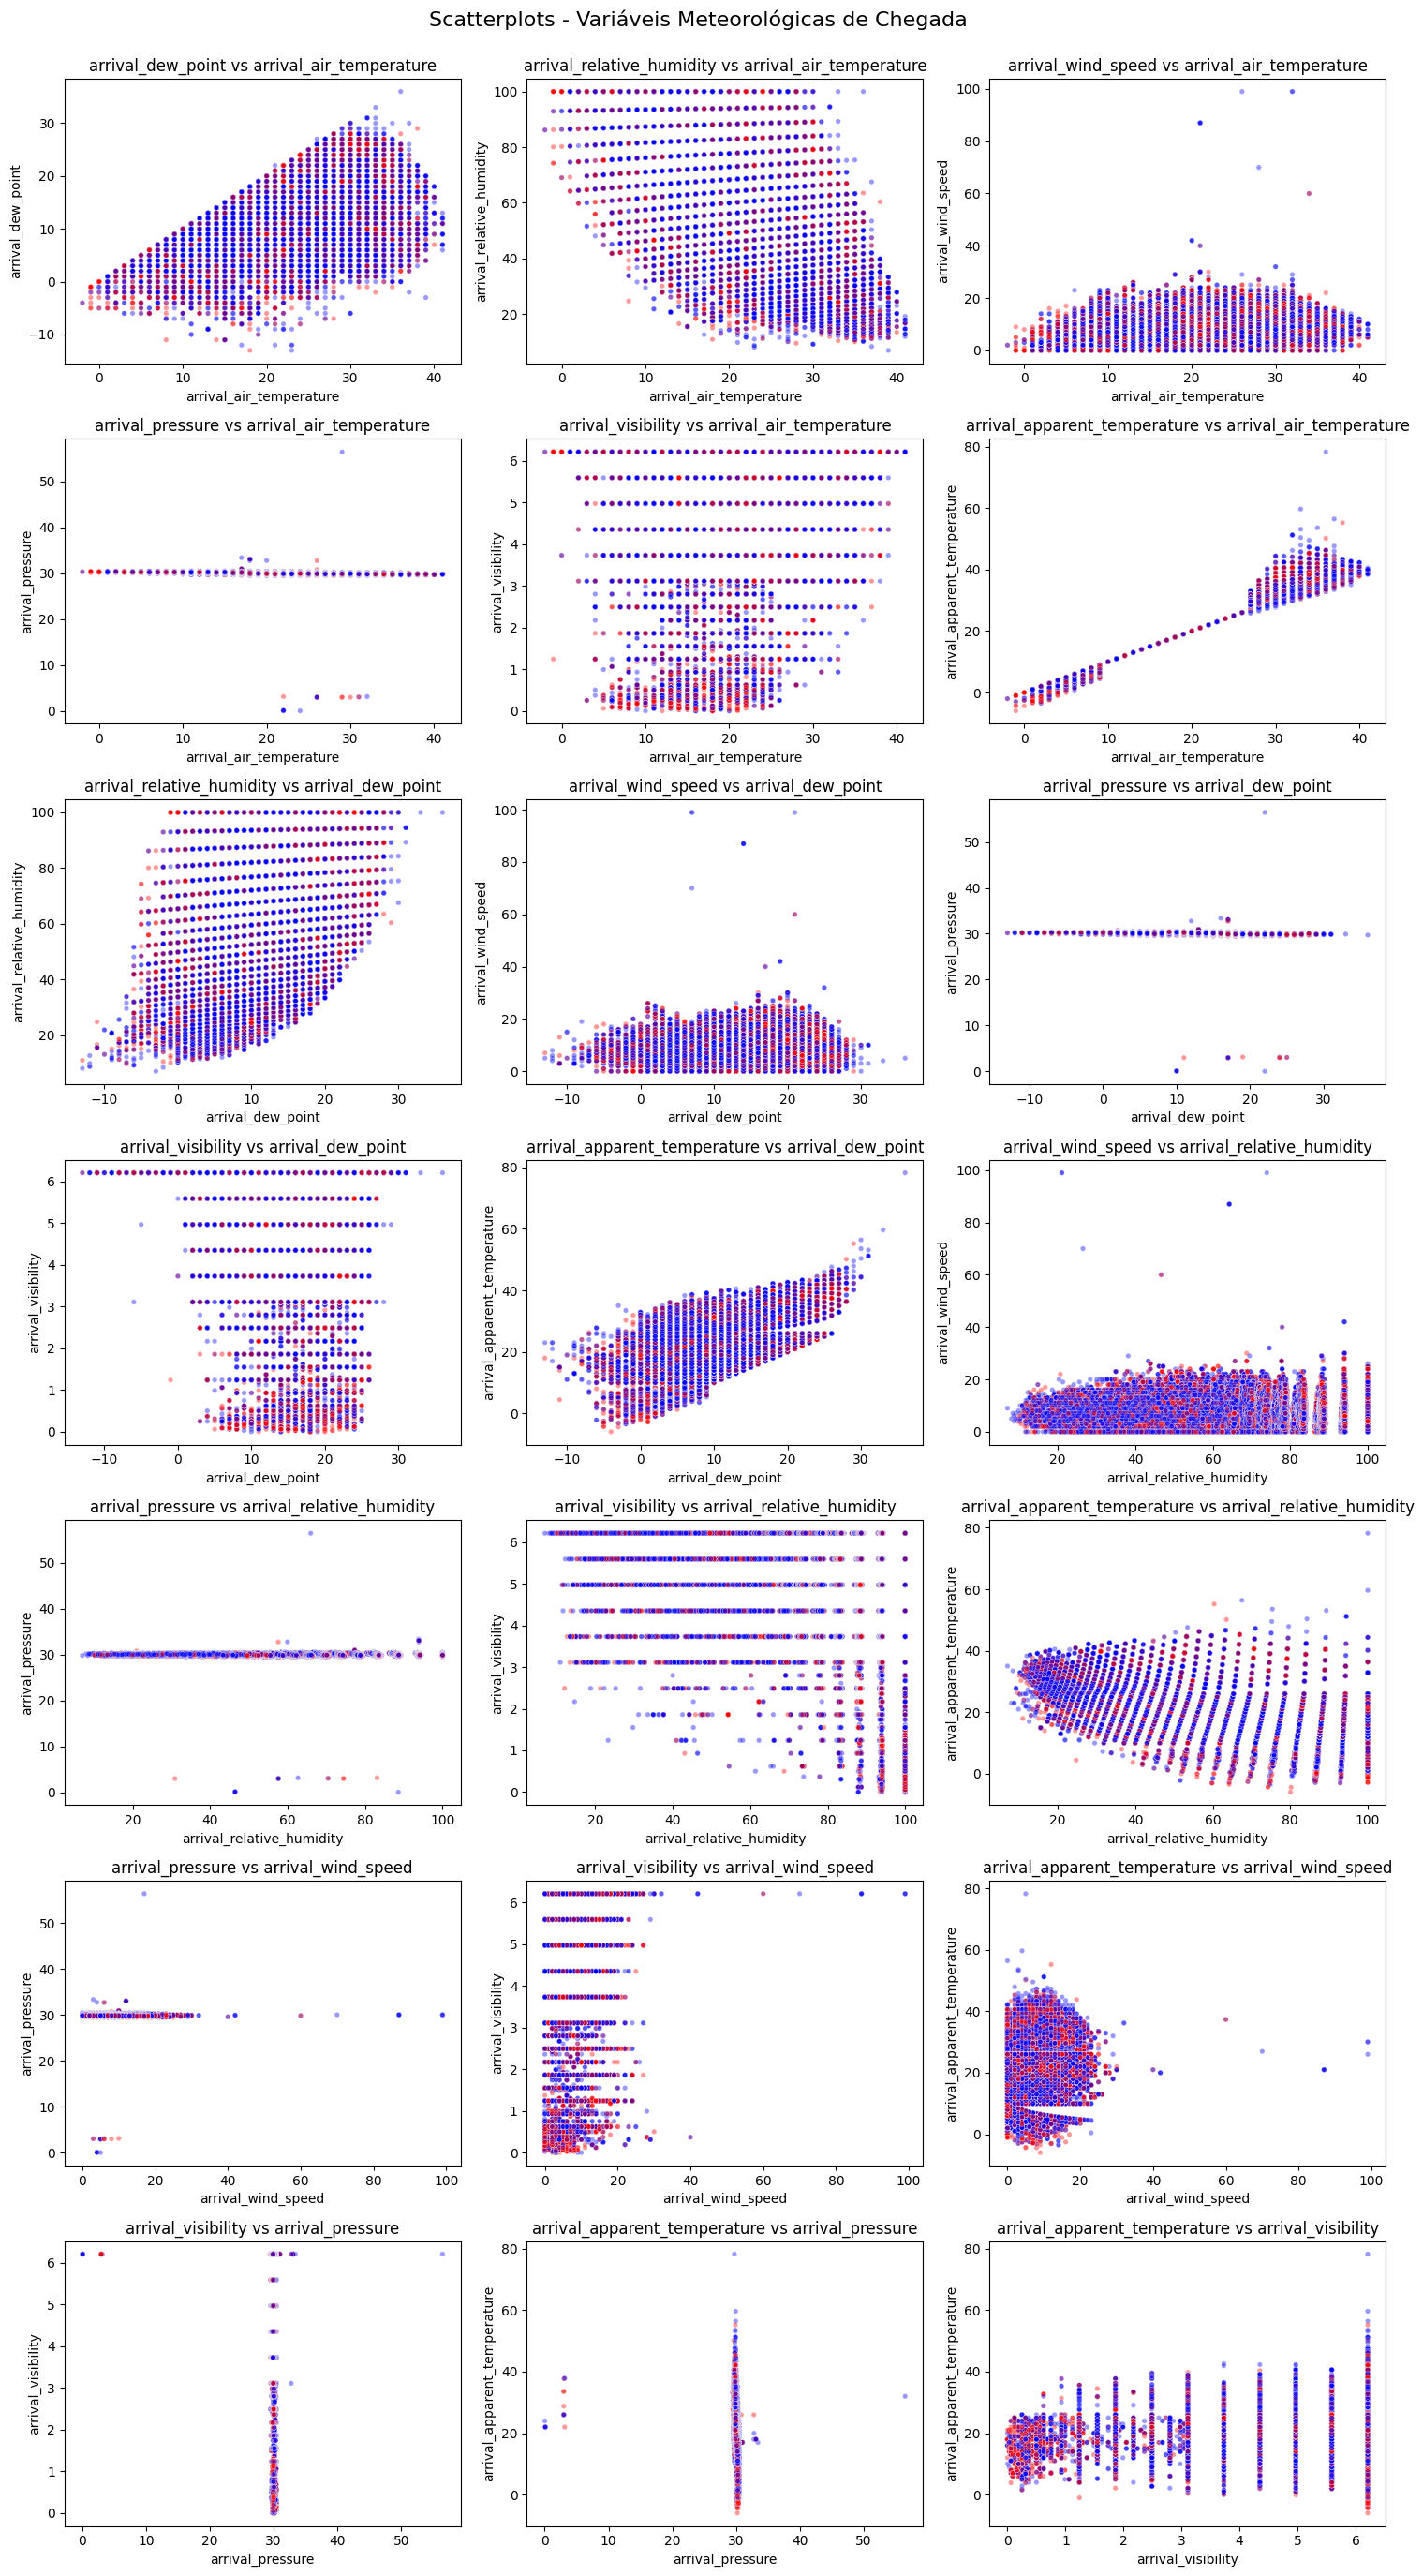

In [26]:
arrival_pairs = list(itertools.combinations(meteorological_arrival_numeric_vars, 2))

n_cols = 3
n_rows = (len(arrival_pairs) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(arrival_pairs):
    ax = axes[i]
    sns.scatterplot(
        data=df_plot,
        x=x_var,
        y=y_var,
        hue='arrival_delay_flag',
        palette={'Atraso': 'red', 'Sem atraso': 'blue'},
        alpha=0.4,
        s=15,
        ax=ax,
        legend=False
    )
    ax.set_title(f'{y_var} vs {x_var}')
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Scatterplots - Variáveis Meteorológicas de Chegada', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


## Variáveis Categóricas

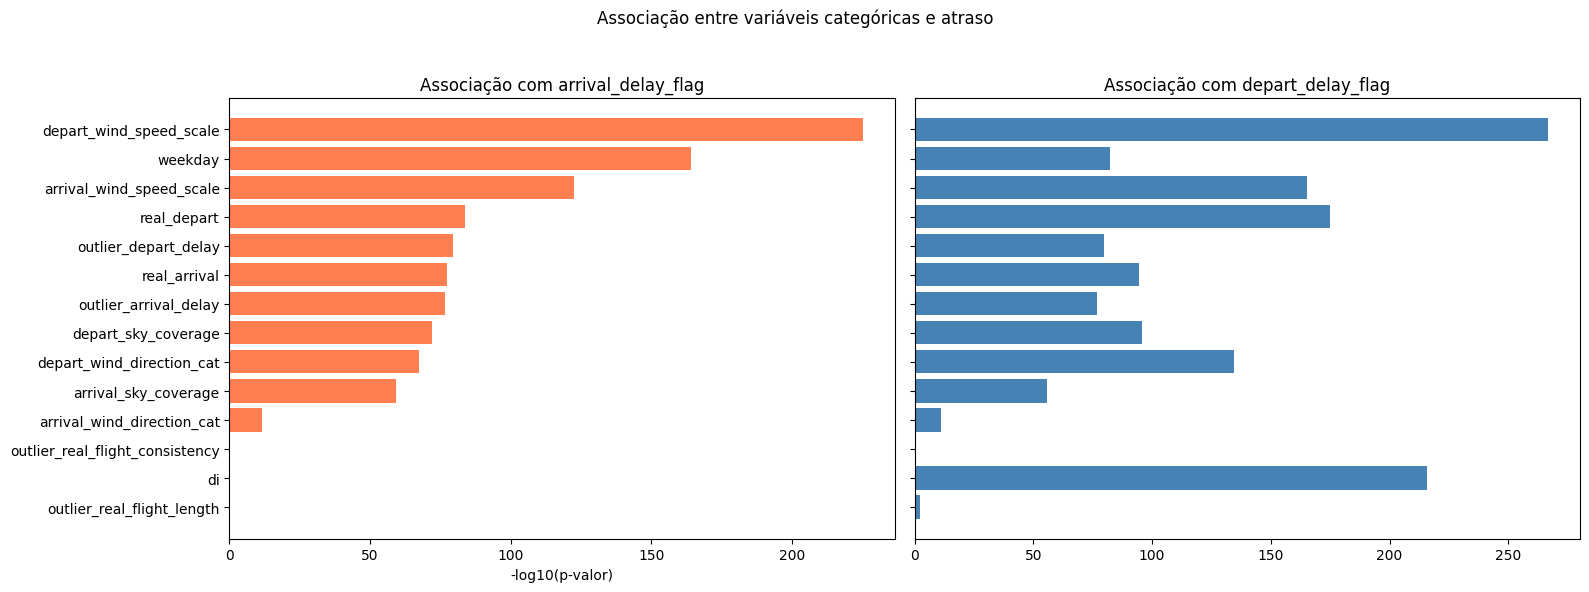

In [ ]:
# Para verificar as associações entre as variáveis categóricas e as flags de atraso vou usar o teste chi-quadrado que ele explicou na ultima aula
# Usaremos isso para calcular o p-valor de associação entre as variáveis categóricas e as flags de atraso
# se p-valor < 0.05, rejeitamos a hipótese nula de que não há associação entre as variáveis, logo são consideradas relevantes para explicar o atraso

cat_vars = df_plot.select_dtypes(include='object').columns.tolist()
cat_vars = [col for col in cat_vars if col not in ['arrival_delay_flag', 'depart_delay_flag']]

def chi2_test(df, flag):
    results = []
    for col in cat_vars:
        contingency = pd.crosstab(df[col], df[flag]) # Cria uma tabela de contingência entre a variável categórica e a flag de atraso
        chi2, p, dof, _ = chi2_contingency(contingency)
        ### Essa logica serve basicamente pra skippar um warning de divisão por zero
        p = max(p, 1e-300)
        if p != 1e-300: # Se o p-valor for 1e-300, significa que não houve associação, portanto nao adicionamos a lista que sera plotada
            results.append((col, -np.log10(p)))
        ###
    return pd.DataFrame(results, columns=['variavel', '-log10(p_valor)']).sort_values('-log10(p_valor)', ascending=False)

chi2_arrival = chi2_test(df_plot, 'arrival_delay_flag')
chi2_depart = chi2_test(df_plot, 'depart_delay_flag')

fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axs[0].barh(chi2_arrival['variavel'], chi2_arrival['-log10(p_valor)'], color='coral')
axs[0].set_title('Associação com arrival_delay_flag')
axs[0].set_xlabel('-log10(p-valor)') # Usando log pra facilitar a visualização ja q os valores de p são muito pequenos
axs[0].invert_yaxis()

axs[1].barh(chi2_depart['variavel'], chi2_depart['-log10(p_valor)'], color='steelblue')
axs[1].set_title('Associação com depart_delay_flag')

plt.suptitle('Associação entre variáveis categóricas e atraso')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()